In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
#read dataset
data = pd.read_csv("airbnb_shanghai_cleaned2283.csv").drop(["Unnamed: 0"],axis=1)[["num_comments","grade","labels"]]
data["popularity"] = np.log(data["num_comments"]+1)*data["grade"]
#data["popularity"] = data["num_comments"]*data["grade"]
data

,num_comments,grade,labels,popularity
0,4,5.0,"['近地铁站', '可以做饭']",8.047190
1,5,5.0,"['灵活取消', '近地铁站']",8.958797
2,5,4.8,"['超赞房东', '可开发票', '行李寄存', '免费停车', '可以做饭', '花园或后院']",8.600445
3,3,5.0,"['超赞房东', '灵活取消', '近地铁站', '可以做饭']",6.931472
4,8,4.8,"['超赞房东', '自助入住', '近地铁站', '可以做饭']",10.546678
...,...,...,...,...
2870,1,3.0,"['灵活取消', '行李寄存', '免费停车', '可以做饭']",2.079442
2871,181,4.9,"['超赞房东', '可开发票', '灵活取消', '提供接送机', '行李寄存', '自助入住']",25.499633
2872,22,4.9,"['超赞房东', '行李寄存', '可以做饭', '浴缸', '可以停车']",15.363922
2873,1,5.0,"['可开发票', '灵活取消', '近地铁站', '小区环境好', '允许吸烟']",3.465736


Find 10  most frequent label

In [ ]:
l = [eval(a) for a in data["labels"].tolist()]
list_labels = [a for  b in l for a in b]
freq_labels = Counter(list_labels)
freq_labels = sorted(freq_labels.items(), key = lambda x: x[1], reverse = True)
freq_labels

[('近地铁站', 2152),
 ('可以做饭', 2082),
 ('超赞房东', 1514),
 ('自助入住', 1499),
 ('可开发票', 1256),
 ('行李寄存', 1224),
 ('灵活取消', 1057),
 ('可以停车', 584),
 ('免费停车', 551),
 ('允许吸烟', 325),
 ('投影仪', 297),
 ('花园或后院', 239),
 ('可携宠物', 220),
 ('小区环境好', 184),
 ('浴缸', 157),
 ('供应早餐', 138),
 ('提供接送机', 112),
 ('EV 充电桩', 102),
 ('落地窗', 83),
 ('夜景', 83),
 ('爱彼迎专享', 58),
 ('桌游', 51),
 ('儿童餐椅', 34),
 ('婴儿床', 31),
 ('江景', 24),
 ('烧烤区', 23),
 ('卡拉 OK', 11),
 ('湖景', 2)]

In [ ]:
ten_most = ['近地铁站', '可以做饭', '超赞房东', '自助入住', '可开发票', '行李寄存', '灵活取消', '可以停车', '免费停车','允许吸烟' ]

High, medium, low popularity defined

In [ ]:
data["popularity"].describe()

count    2875.000000
mean       12.426048
std         6.179189
min         0.693147
25%         6.931472
50%        12.176043
75%        17.074051
max        29.119717
Name: popularity, dtype: float64

In [ ]:
#bound = data["popularity"].describe()["75%"] + 1.5*(data["popularity"].describe()["75%"]-data["popularity"].describe()["25%"])
bound =22.1

In [ ]:
low = data[data["popularity"]<=bound]["labels"]
#medium = data[(data["popularity"]>10) & (data["popularity"]<=40)]["labels"]
high = data[data["popularity"]>bound]["labels"]   
print(len(low),len(high))
high

2675 200


74      ['超赞房东', '可开发票', '提供接送机', '行李寄存', '自助入住', '免费停车']
78      ['超赞房东', '可开发票', '灵活取消', '提供接送机', '行李寄存', '自助入住']
95                       ['超赞房东', '灵活取消', '行李寄存', '可以做饭']
136             ['超赞房东', '近地铁站', '可以做饭', '小区环境好', '供应早餐']
149                     ['灵活取消', '免费停车', '可以做饭', '小区环境好']
                              ...                        
2686     ['超赞房东', '可开发票', '行李寄存', '自助入住', '近地铁站', '可以做饭']
2701     ['超赞房东', '可开发票', '灵活取消', '行李寄存', '自助入住', '可以做饭']
2775     ['超赞房东', '可开发票', '行李寄存', '自助入住', '近地铁站', '可以做饭']
2849       ['超赞房东', '行李寄存', '自助入住', '免费停车', '可以做饭', '桌游']
2871    ['超赞房东', '可开发票', '灵活取消', '提供接送机', '行李寄存', '自助入住']
Name: labels, Length: 200, dtype: object

In [ ]:
def find_freq (labels_series, label):
  l = [eval(a) for a in labels_series.tolist()]
  list_labels = [a for  b in l for a in b]
  freq_labels = Counter(list_labels)
  count = freq_labels[label]
  return count

In [ ]:
high_ten_most = [find_freq(high, label)/len(high) for label in ten_most]
high_ten_most

[0.805, 0.745, 0.785, 0.805, 0.565, 0.51, 0.21, 0.3, 0.14, 0.05]

In [ ]:
low_ten_most = [find_freq(low, label)/len(low) for label in ten_most]
low_ten_most

[0.7442990654205608,
 0.7226168224299065,
 0.5072897196261682,
 0.5001869158878505,
 0.42728971962616824,
 0.4194392523364486,
 0.3794392523364486,
 0.1958878504672897,
 0.1955140186915888,
 0.11775700934579439]

PLOT

In [ ]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2022-04-11 16:25:30--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  30.5MB/s    in 0.3s    

2022-04-11 16:25:30 (30.5 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



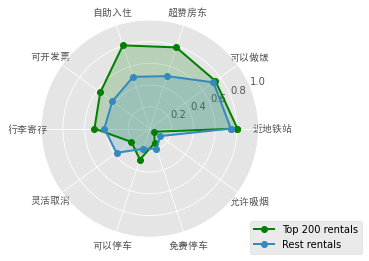

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# show Chinese
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  

plt.style.use('ggplot')

feature = ten_most
N = len(feature)

#set the angles
angles = np.linspace(0,2*np.pi,N,endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

high_ten = np.concatenate((high_ten_most,[high_ten_most[0]]))
#medium_ten = np.concatenate((medium_ten_most,[medium_ten_most[0]]))
low_ten = np.concatenate((low_ten_most,[low_ten_most[0]]))

#plot
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, high_ten, marker='o', color='g', linewidth=2, label='Extremly popular')
ax.fill(angles, high_ten, 'g', alpha=0.2)

#ax.plot(angles, medium_ten, marker='o', color='g', linewidth=2, label='medium')
#ax.fill(angles, medium_ten, 'C1', alpha=0.2)

ax.plot(angles, low_ten, marker='o', color='C1', linewidth=2, label='Nomal')
ax.fill(angles, low_ten, 'C1', alpha=0.2)

plt.xticks(fontproperties=zhfont)
ax.legend(['Top 200 rentals','Rest rentals'],loc='center right',bbox_to_anchor=(1.5, 0))
ax.set_thetagrids(angles*180/np.pi, feature)
ax.set_ylim(0,1)
#plt.title(u'Radar Plot of 10 Most Popular Labels', fontproperties=zhfont, size=15)
#plt.title('Star Plot of 10 Most Popular Labels')
ax.grid(True)
plt.savefig("Star.png",dpi=200)
plt.show()